In [1]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os

# Connect to the SQLite database
conn = sqlite3.connect('/content/data.db')
cur = conn.cursor()

# Query the training_model table
query = "SELECT * FROM training_model;"
df_training_model = pd.read_sql_query(query, conn)

# Close the connection
conn.close()

# Display the first few rows of the DataFrame
print(df_training_model.head())



   age  education has_deposits     balance      job  outcome
0   18    primary          yes  531.305223  student  success
1   19    primary          yes  545.158109  Unknown  success
2   19    unknown          yes   19.190834  student  success
3   19    unknown          yes  -42.194654  student  success
4   19  secondary          yes  181.419476  student  success


In [2]:
# Summary statistics for numerical columns
print("Summary Statistics for Numerical Columns:")
print(df_training_model.describe())

# Check for null values
print("\nMissing Values in Each Column:")
print(df_training_model.isnull().sum())


Summary Statistics for Numerical Columns:
               age       balance
count  2299.000000   2299.000000
mean     42.076555   1638.583768
std      12.880392   3356.112599
min      18.000000  -1235.852180
25%      33.000000    120.560431
50%      39.000000    614.258394
75%      50.000000   1945.330601
max      93.000000  81057.884809

Missing Values in Each Column:
age             0
education       0
has_deposits    0
balance         0
job             0
outcome         0
dtype: int64


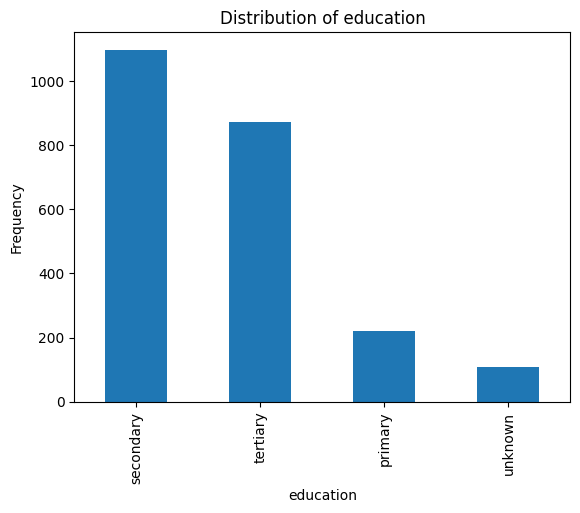

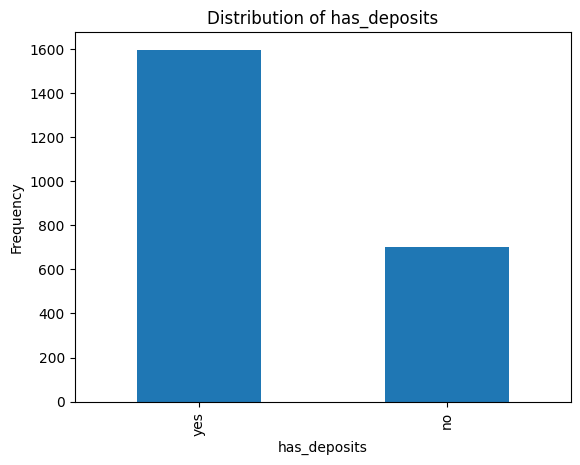

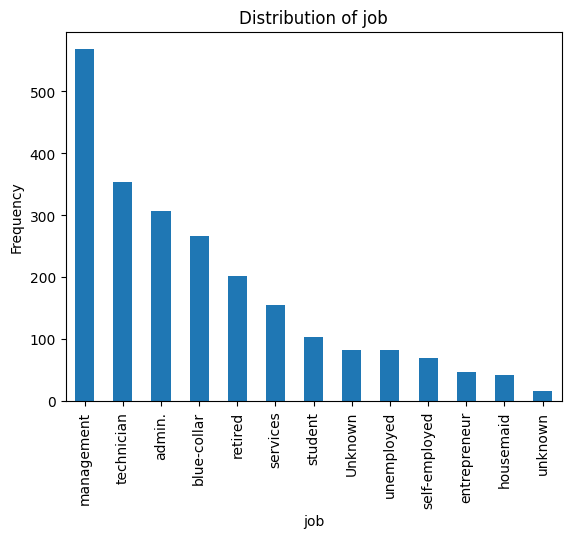

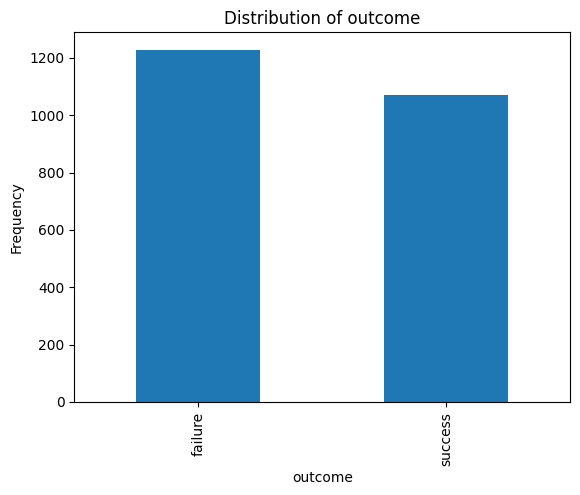

In [3]:
'''
!CHANGE: two unknowns - Unknown x unknown
'''

# Function to plot the distribution of categorical variables
def plot_categorical_distribution(df, column_name):
    df[column_name].value_counts().plot(kind='bar')
    plt.title(f'Distribution of {column_name}')
    plt.ylabel('Frequency')
    plt.xlabel(column_name)
    plt.show()

categorical_columns = ['education', 'has_deposits', 'job', 'outcome']

for column in categorical_columns:
    plot_categorical_distribution(df_training_model, column)


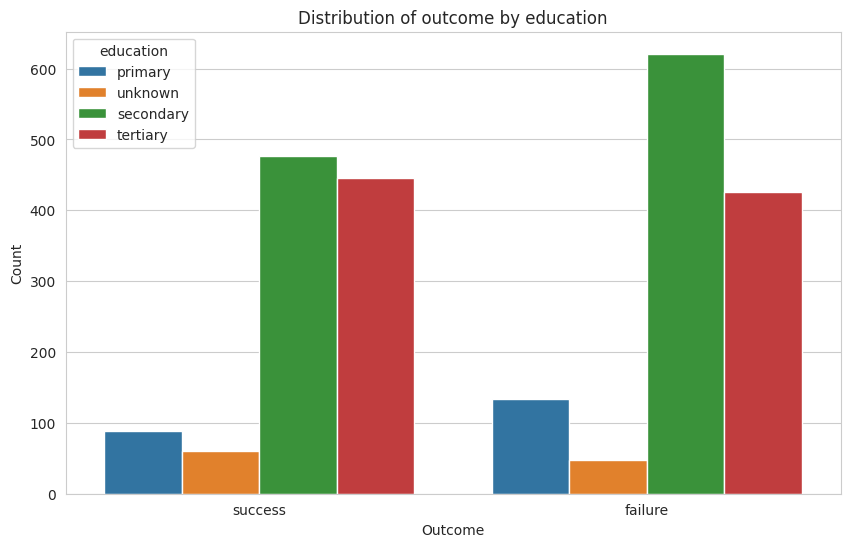

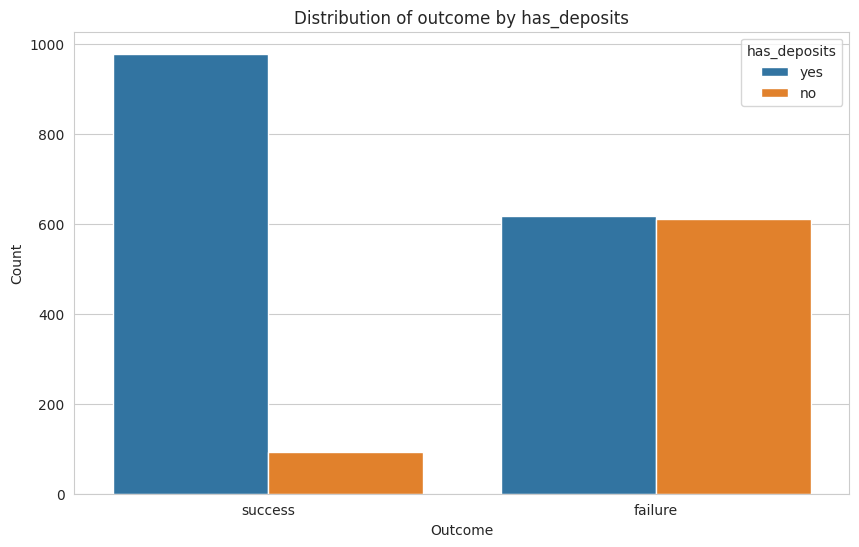

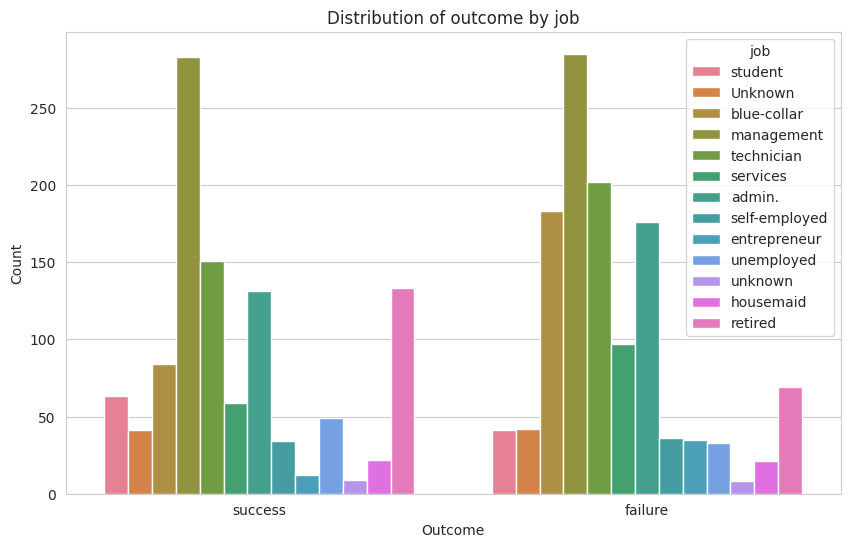

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df_training_model is your DataFrame and it contains the columns of interest

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# List of columns to plot
categorical_columns = ['education', 'has_deposits', 'job']

# Plotting
for column in categorical_columns:
    plt.figure(figsize=(10, 6))  # Set the figure size for better readability
    sns.countplot(data=df_training_model, x='outcome', hue=column)
    plt.title(f'Distribution of outcome by {column}')
    plt.ylabel('Count')
    plt.xlabel('Outcome')
    plt.legend(title=column)
    plt.show()



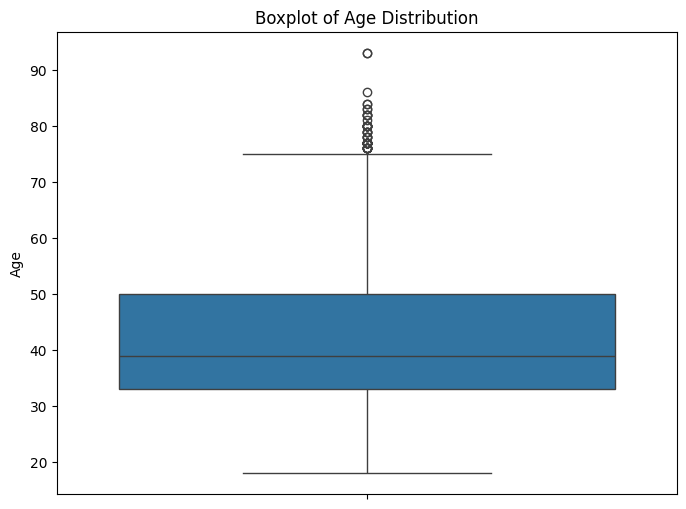

In [ ]:
# Boxplot for 'age'
plt.figure(figsize=(8, 6))
sns.boxplot(y='age', data=df_training_model)
plt.title('Boxplot of Age Distribution')
plt.ylabel('Age')
plt.show()

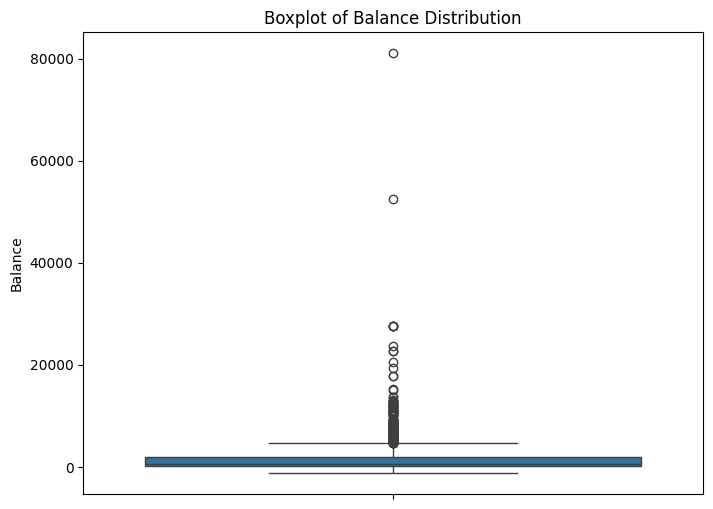

In [ ]:
# Boxplot for 'balance'
plt.figure(figsize=(8, 6))
sns.boxplot(y='balance', data=df_training_model)
plt.title('Boxplot of Balance Distribution')
plt.ylabel('Balance')
plt.show()


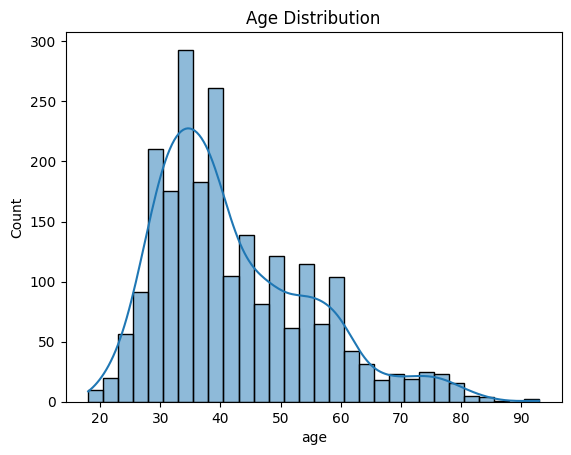

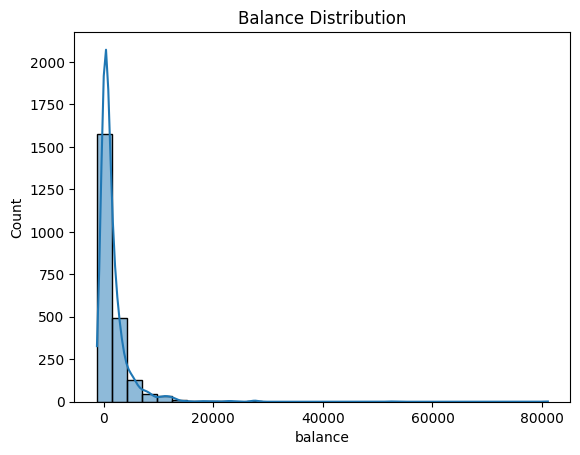

In [ ]:
sns.histplot(df_training_model['age'], kde=True)
plt.title('Age Distribution')
plt.show()

sns.histplot(df_training_model['balance'], kde=True, bins=30)
plt.title('Balance Distribution')
plt.show()


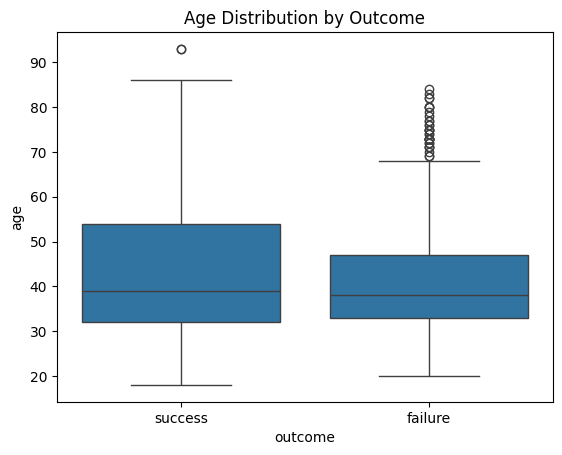

In [ ]:
sns.boxplot(x='outcome', y='age', data=df_training_model)
plt.title('Age Distribution by Outcome')
plt.show()


In [ ]:
categorical_columns = ['education', 'has_deposits', 'job', 'outcome']
for column in categorical_columns:
    print(df_training_model[column].value_counts())


secondary    1098
tertiary      872
primary       222
unknown       107
Name: education, dtype: int64
yes    1596
no      703
Name: has_deposits, dtype: int64
management       568
technician       353
admin.           307
blue-collar      267
retired          202
services         156
student          104
Unknown           83
unemployed        82
self-employed     70
entrepreneur      47
housemaid         43
unknown           17
Name: job, dtype: int64
failure    1228
success    1071
Name: outcome, dtype: int64


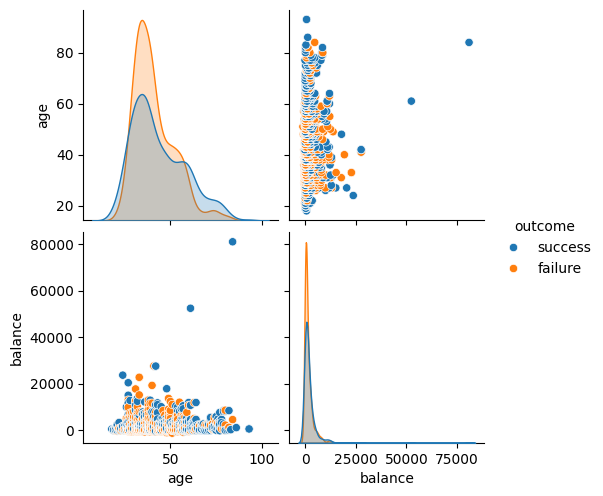

In [ ]:
# Assuming you have a few numerical columns in 'df_training_model', e.g., 'age' and 'balance'
# and want to see how they pair up with a categorical variable 'outcome'
sns.pairplot(df_training_model, hue='outcome')
plt.show()


outcome    failure  success
education                  
primary        134       88
secondary      621      477
tertiary       426      446
unknown         47       60


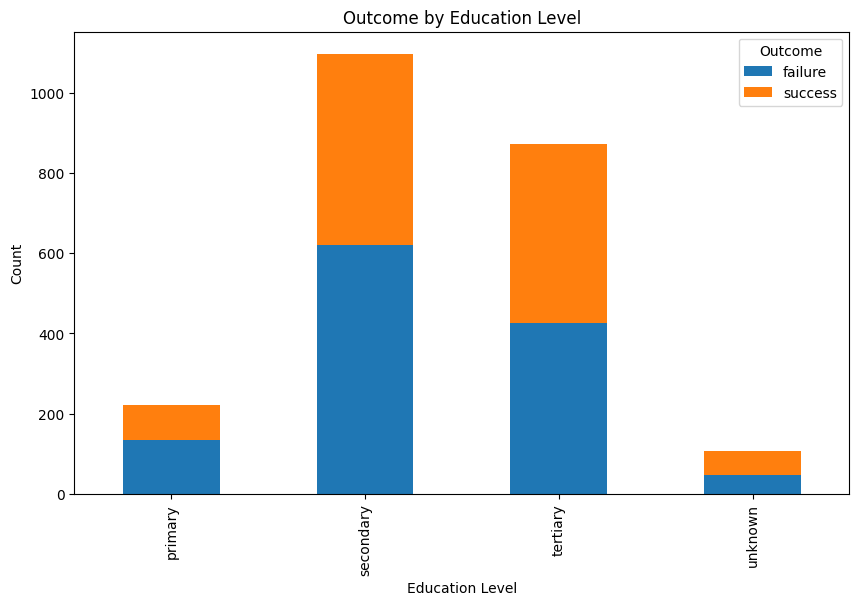

In [ ]:

# Generate a cross-tabulation table
cross_tab = pd.crosstab(df_training_model['education'], df_training_model['outcome'])

# Print the cross-tabulation table
print(cross_tab)

# Optional: Plot the cross-tabulation
cross_tab.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Outcome by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.legend(title='Outcome')
plt.show()


<ipython-input-16-283d39016a92>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlations = df_training_model.corr()


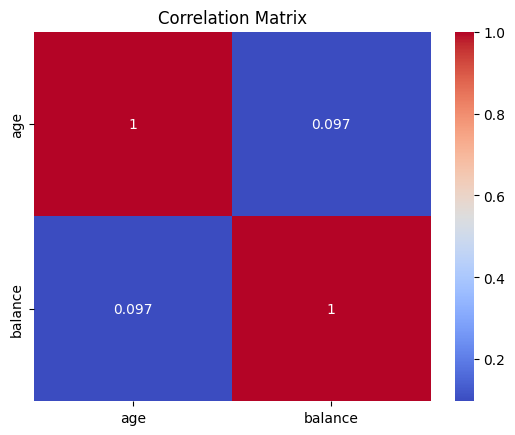

In [ ]:
correlations = df_training_model.corr()
sns.heatmap(correlations, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [ ]:

categorical_columns = ['outcome', 'job']

# Apply one-hot encoding to the DataFrame
df_encoded = pd.get_dummies(df_training_model, columns=categorical_columns)

# Display the first few rows of the encoded DataFrame to verify
print(df_encoded.head())


   age  education has_deposits     balance  outcome_failure  outcome_success  \
0   18    primary          yes  531.305223                0                1   
1   19    primary          yes  545.158109                0                1   
2   19    unknown          yes   19.190834                0                1   
3   19    unknown          yes  -42.194654                0                1   
4   19  secondary          yes  181.419476                0                1   

   job_Unknown  job_admin.  job_blue-collar  job_entrepreneur  job_housemaid  \
0            0           0                0                 0              0   
1            1           0                0                 0              0   
2            0           0                0                 0              0   
3            0           0                0                 0              0   
4            0           0                0                 0              0   

   job_management  job_retired  job_se

<ipython-input-15-ff72e012c926>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix_encoded = df_encoded.corr()


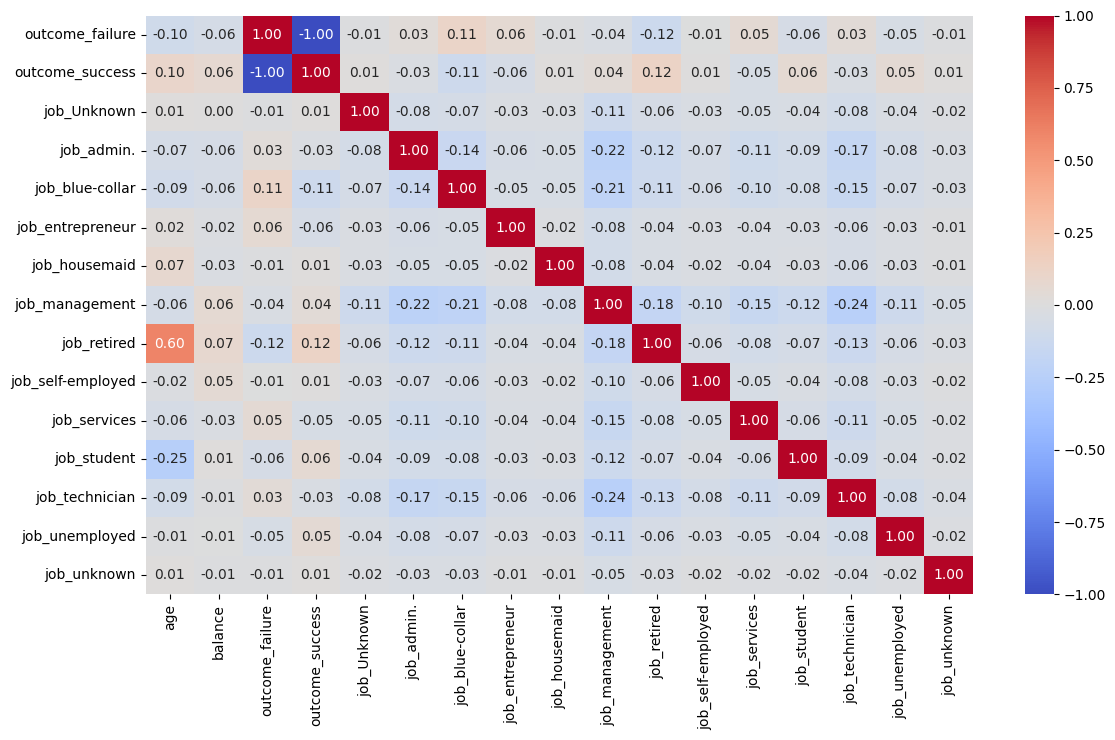

In [ ]:


# Assuming df_encoded is your DataFrame after one-hot encoding
# Calculate the correlation matrix for the encoded DataFrame
correlation_matrix_encoded = df_encoded.corr()

encoded_columns = [col for col in df_encoded.columns if 'outcome_' in col or 'job_' in col]
correlation_with_encoded = correlation_matrix_encoded.loc[encoded_columns, :]

# Set up the matplotlib figure
plt.figure(figsize=(12, len(encoded_columns)/2))

# Generate a heatmap for the selected part of the correlation matrix
sns.heatmap(correlation_with_encoded, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)

# Adjust layout to make room for the colorbar
plt.tight_layout()

# Show the plot
plt.show()


<ipython-input-16-c1650fe3d6e9>:8: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix_encoded = df_encoded.corr()
<ipython-input-16-c1650fe3d6e9>:24: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


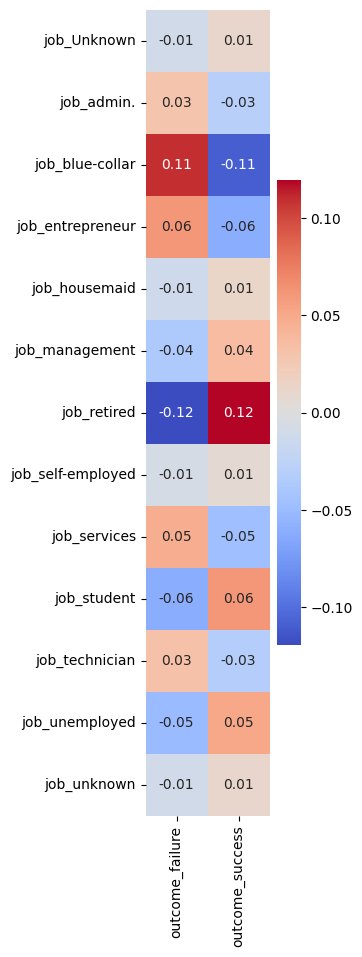

In [ ]:


# Assuming df_training_model is your DataFrame and you have already one-hot encoded 'outcome' and 'job' columns
categorical_columns = ['outcome', 'job']

# Apply one-hot encoding to the DataFrame
df_encoded = pd.get_dummies(df_training_model, columns=categorical_columns)

# Calculate the correlation matrix for the encoded DataFrame
correlation_matrix_encoded = df_encoded.corr()

# Extract only the columns related to the 'job' and 'outcome' one-hot encoded variables
job_columns = [col for col in df_encoded.columns if 'job_' in col]
outcome_columns = [col for col in df_encoded.columns if 'outcome_' in col]

# Now, filter the correlation matrix to only show correlations between 'job' and 'outcome' one-hot encoded variables
correlation_job_outcome = correlation_matrix_encoded.loc[job_columns, outcome_columns]

# Set up the matplotlib figure
plt.figure(figsize=(len(outcome_columns), len(job_columns)))

# Generate a heatmap for the filtered part of the correlation matrix
sns.heatmap(correlation_job_outcome, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, square=True)

# Adjust layout to make room for the colorbar
plt.tight_layout()

# Show the plot
plt.show()


In [ ]:

# Connect to the SQLite database
conn = sqlite3.connect('/content/data.db')

# Read the data from the 'training_model' table
df = pd.read_sql_query("SELECT * FROM training_model", conn)

# Close the connection to the database
conn.close()

# Assuming 'outcome' and 'job' are your categorical variables of interest
# Create a contingency table
contingency_table = pd.crosstab(df['outcome'], df['job'])

# Display the contingency table
print("Contingency Table:")
print(contingency_table)


Contingency Table:
job      Unknown  admin.  blue-collar  entrepreneur  housemaid  management  \
outcome                                                                      
failure       42     176          183            35         21         285   
success       41     131           84            12         22         283   

job      retired  self-employed  services  student  technician  unemployed  \
outcome                                                                      
failure       69             36        97       41         202          33   
success      133             34        59       63         151          49   

job      unknown  
outcome           
failure        8  
success        9  


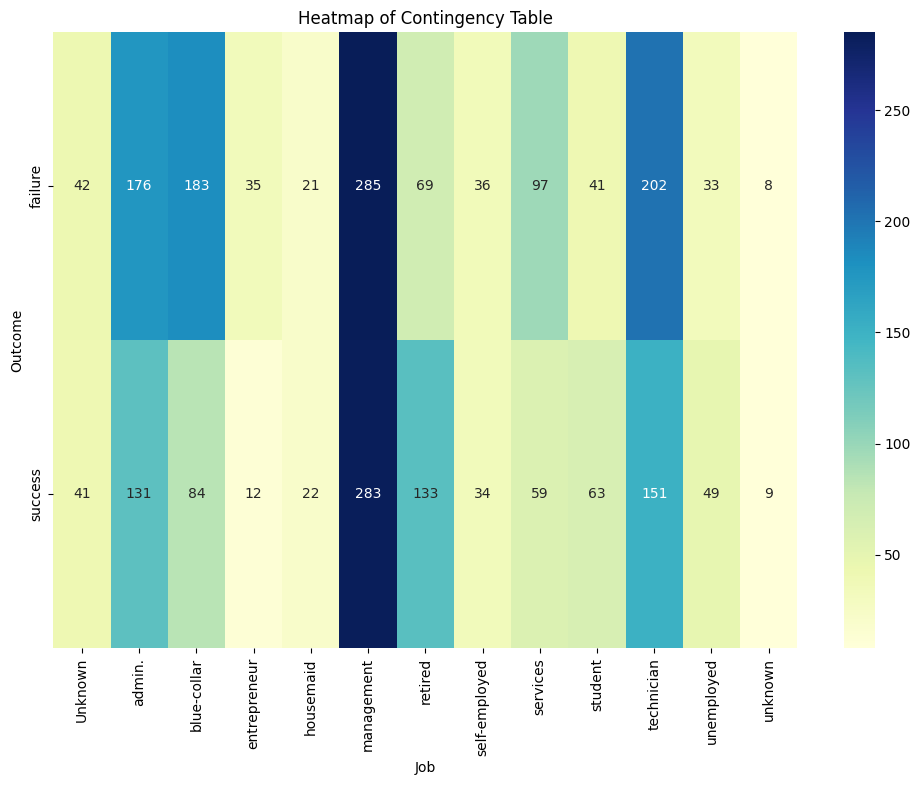

In [ ]:


# Plotting the contingency table as a heatmap
plt.figure(figsize=(12, 8))  # Adjust the figure size as necessary
sns.heatmap(contingency_table, annot=True, cmap="YlGnBu", fmt='d')

plt.title('Heatmap of Contingency Table')
plt.ylabel('Outcome')  # Adjust based on your actual column names
plt.xlabel('Job')  # Adjust based on your actual column names
plt.show()


In [ ]:

from scipy.stats import chi2_contingency

# Assuming you have already loaded your data into the 'df' DataFrame

# Step 2: Create a Contingency Table
# Replace 'job' with the name of your actual categorical variable you want to compare with 'outcome'
contingency_table = pd.crosstab(df_training_model['outcome'], df_training_model['job'])

# Display the contingency table
print("Contingency Table:")
print(contingency_table)

# Step 3: Perform the Chi-square Test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Display the results
print("\nChi-square Test Results:")
print(f"Chi-square Statistic: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of Freedom: {dof}")
print("Expected Frequencies:")
print(expected)


Contingency Table:
job      Unknown  admin.  blue-collar  entrepreneur  housemaid  management  \
outcome                                                                      
failure       42     176          183            35         21         285   
success       41     131           84            12         22         283   

job      retired  self-employed  services  student  technician  unemployed  \
outcome                                                                      
failure       69             36        97       41         202          33   
success      133             34        59       63         151          49   

job      unknown  
outcome           
failure        8  
success        9  

Chi-square Test Results:
Chi-square Statistic: 89.08915362439811
P-value: 7.408375030108655e-14
Degrees of Freedom: 12
Expected Frequencies:
[[ 44.33405829 163.98260113 142.61678991  25.10482819  22.96824706
  303.39451936 107.89734667  37.39016964  83.32666377  55.55110918
  1